In [1133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set_theme()

In [1134]:
advertising = pd.read_csv("../../data/advertising.csv", index_col="Unnamed: 0")
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [1135]:
advertising

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [1136]:
advertising[advertising.columns] = StandardScaler().fit_transform(advertising)
advertising.head()

,TV,Radio,Newspaper,Sales
1,0.969852,0.981522,1.778945,1.552053
2,-1.197376,1.082808,0.669579,-0.696046
3,-1.516155,1.528463,1.783549,-0.907406
4,0.052050,1.217855,1.286405,0.860330
5,0.394182,-0.841614,1.281802,-0.215683


GPR example

In [1137]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(X, y)
gpr.score(X, y)
gpr.predict(X[:1,:], return_std=True), X.shape, y.shape

c:\Users\nikok\mambaforge\envs\oml\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\nikok\mambaforge\envs\oml\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


((array([653.08792288]), array([316.68016218])), (500, 4), (500,))

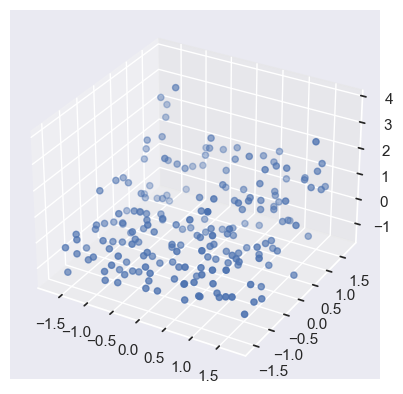

In [1138]:
X = advertising[["TV", "Radio", "Newspaper"]].to_numpy()
y = advertising["Sales"].to_numpy()
ax = plt.figure().add_subplot(projection = "3d")
ax.scatter3D(X.T[0], X.T[1], X.T[2])

Correlation between each of the xs to y

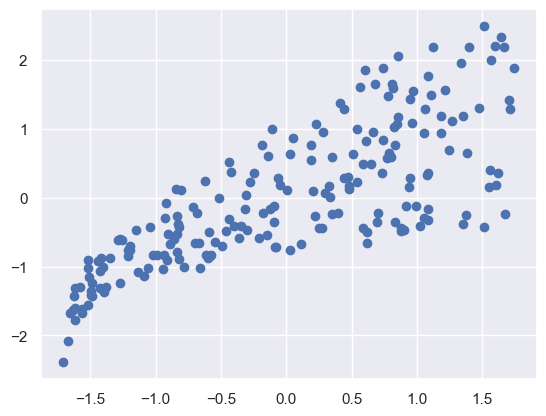

In [1139]:
plt.scatter(advertising["TV"], advertising["Sales"])

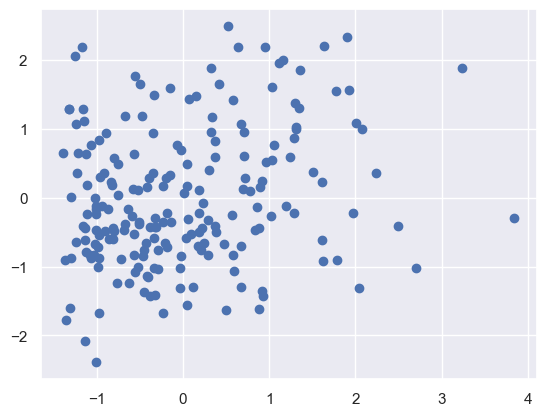

In [1140]:
plt.scatter(advertising["Newspaper"], advertising["Sales"])

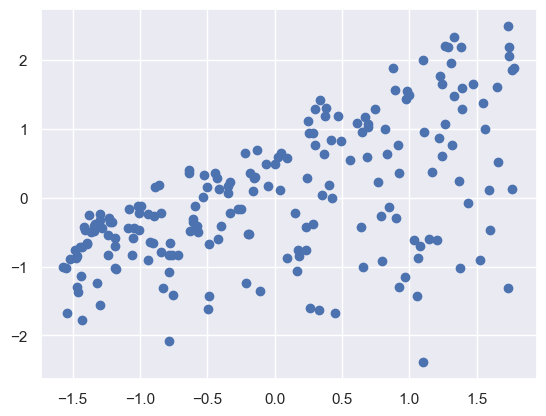

In [1141]:
plt.scatter(advertising["Radio"], advertising["Sales"])

PCA to reduce input dims to 2

[16.55809475 14.02323885]


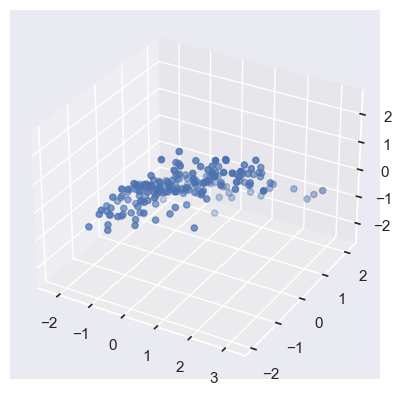

In [1142]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
print(pca.singular_values_)
ax = plt.figure().add_subplot(projection = "3d")
ax.scatter3D(X.T[0], X.T[1], y)

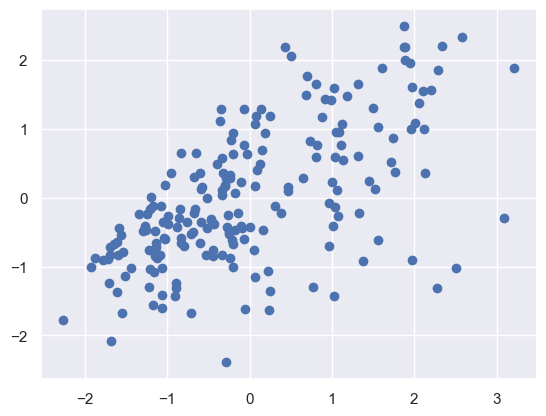

In [1143]:
plt.scatter(X.T[0], y)

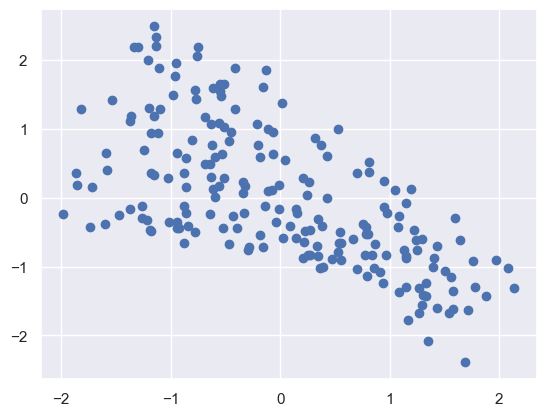

In [1144]:
plt.scatter(X.T[1], y)

In [1145]:
gpr = GaussianProcessRegressor(normalize_y=True)
gpr.fit(X, y)

GaussianProcessRegressor(normalize_y=True)

In [1146]:
X[0]

array([ 2.1111237 , -0.54502721])

In [1147]:
gpr.predict(X[:1,:])

array([1.56023407])

In [1148]:
np.min(X.T[0]), np.max(X.T[0]), np.min(X.T[1]), np.max(X.T[1])

(-2.2654077269492543,
 3.211688086776323,
 -1.980987088071259,
 2.1344416714158383)

In [1149]:
u = np.linspace(-2., 2., 1000)
v = np.linspace(-2., 2., 1000)
U, V = np.meshgrid(u, v)
U.shape, V.shape, U, V

((1000, 1000),
 (1000, 1000),
 array([[-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
          1.995996  ,  2.        ],
        [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
          1.995996  ,  2.        ],
        [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
          1.995996  ,  2.        ],
        ...,
        [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
          1.995996  ,  2.        ],
        [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
          1.995996  ,  2.        ],
        [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
          1.995996  ,  2.        ]]),
 array([[-2.        , -2.        , -2.        , ..., -2.        ,
         -2.        , -2.        ],
        [-1.995996  , -1.995996  , -1.995996  , ..., -1.995996  ,
         -1.995996  , -1.995996  ],
        [-1.99199199, -1.99199199, -1.99199199, ..., -1.99199199,
         -1.99199199, -1.99199199],
        ...,
        [ 1.99199199,  1

In [1150]:
a = np.expand_dims(np.ravel(U), 1)
a.shape, a

((1000000, 1),
 array([[-2.        ],
        [-1.995996  ],
        [-1.99199199],
        ...,
        [ 1.99199199],
        [ 1.995996  ],
        [ 2.        ]]))

In [1151]:
a = np.concatenate([np.expand_dims(np.ravel(U), axis=1), np.expand_dims(np.ravel(V), axis=1)], axis=1)
a.shape, a

((1000000, 2),
 array([[-2.        , -2.        ],
        [-1.995996  , -2.        ],
        [-1.99199199, -2.        ],
        ...,
        [ 1.99199199,  2.        ],
        [ 1.995996  ,  2.        ],
        [ 2.        ,  2.        ]]))

In [1152]:
zs = gpr.predict(a)
zs.shape, zs

((1000000,),
 array([-1.43142236e+03, -1.41204690e+03, -1.39282613e+03, ...,
        -2.88534045e-01, -4.01245236e-01, -5.14138401e-01]))

In [1153]:
Z = np.reshape(zs, U.shape)
Z.shape, Z

((1000, 1000),
 array([[-1.43142236e+03, -1.41204690e+03, -1.39282613e+03, ...,
          3.82376657e+02,  3.89637499e+02,  3.96990535e+02],
        [-1.41714667e+03, -1.39795147e+03, -1.37890986e+03, ...,
          3.76787751e+02,  3.83971622e+02,  3.91246827e+02],
        [-1.40293874e+03, -1.38392290e+03, -1.36505955e+03, ...,
          3.71251780e+02,  3.78358901e+02,  3.85556514e+02],
        ...,
        [ 1.99389296e+02,  1.96483173e+02,  1.93613979e+02, ...,
         -6.17776573e-01, -7.22722530e-01, -8.27861786e-01],
        [ 2.01865457e+02,  1.98936392e+02,  1.96044635e+02, ...,
         -4.60579157e-01, -5.69378912e-01, -6.78366423e-01],
        [ 2.04359530e+02,  2.01407660e+02,  1.98493480e+02, ...,
         -2.88534045e-01, -4.01245236e-01, -5.14138401e-01]]))

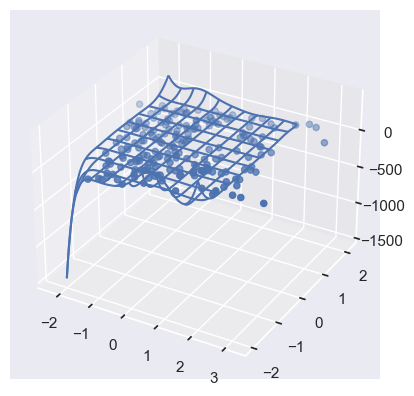

In [1154]:
ax = plt.figure().add_subplot(projection = "3d")
ax.scatter3D(X.T[0], X.T[1], y)
ax.plot_wireframe(U, V, Z, rstride=100, cstride=100)
# ax.set_zlim3d(-10, 10)

In [1155]:
z_1 = gpr.fit(X.T[:1], y).predict(u)
z_2 = gpr.fit(X.T[2:], y).predict(v)

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.11112370e+00  9.63044201e-01  1.97568580e+00  1.74293539e+00
  3.86960891e-01  2.27665828e+00  3.17186325e-03 -8.39906010e-01
 -2.26540773e+00 -1.13458115e+00 -1.21416821e+00 -6.47171894e-01
  1.37921018e+00 -1.59537526e+00  1.08032202e+00  1.96991938e+00
  3.08805064e+00  1.89288215e+00 -7.08283732e-01 -3.34498821e-01
  1.10796157e+00 -8.53343856e-01 -6.20458387e-02 -2.38546323e-01
 -1.09384823e+00 -9.93546239e-01 -3.00105339e-01 -3.24347803e-01
  1.82299789e-01 -1.98333806e-01  9.91932802e-01 -1.00369594e-01
 -1.15469353e+00 -8.28210603e-01 -1.88282486e+00 -1.24841119e+00
  4.35758918e-01  1.52698378e+00  5.29025604e-02  9.16518355e-01
  1.22923760e-01  8.05375671e-01 -3.52991024e-01 -6.80948170e-01
  2.23699542e-01  6.25673009e-02 -5.99191663e-01  6.92826560e-01
  4.62286870e-01 -5.35464920e-01 -6.84441368e-01 -1.60962678e+00
  1.31716771e+00  2.05355438e+00  7.24513272e-02  2.28391917e+00
  2.32022652e-01 -6.60490536e-01  1.61187473e+00 -2.31302769e-01
 -1.51133905e+00  1.95378275e+00 -2.42170045e-01 -5.17450054e-01
  8.20671001e-01 -1.78584666e+00 -1.12117620e+00 -1.07623137e+00
 -2.05718623e-01  1.02590042e+00  7.28299810e-01 -4.72388148e-01
 -1.95781886e-01 -8.39048816e-01 -3.32476317e-01  2.51244484e+00
 -1.61541891e+00 -3.40864889e-01 -7.07771929e-01 -1.03937802e+00
 -2.73954422e-01 -4.67406868e-01 -2.50536793e-01  9.61242111e-01
  1.18608670e+00  1.00437878e+00 -4.37506986e-01  1.76091836e+00
  1.32646965e+00  1.71903371e+00 -1.56521489e+00 -1.22565600e+00
  1.55540168e+00  2.19965729e+00 -1.15471024e+00  1.14036480e+00
 -1.58521722e+00 -2.86253292e-01  1.89256753e+00  1.32072775e+00
 -8.94333590e-02  3.21168809e+00 -5.82912882e-01 -5.86963642e-01
 -6.78628703e-02  1.96394553e+00 -8.95988160e-01 -1.44380553e+00
 -1.55032742e+00 -3.65216106e-01  3.14291741e-01  6.83493693e-01
 -1.19429404e+00 -6.04883657e-01  1.05737107e+00  1.07863616e+00
 -5.95313174e-01 -1.72198959e+00  2.13419987e+00 -9.11847157e-01
  6.49474564e-01  2.47803864e-01 -1.26354008e+00 -1.07102827e-01
  2.01214928e+00 -8.28692491e-01  1.03046526e+00 -1.92847716e+00
  5.08079908e-01 -3.38520385e-01 -2.88625666e-01 -2.67487483e-01
 -1.05904982e+00  1.11777679e+00  1.56485238e+00  1.66017793e-01
 -2.37086470e-01  1.49887324e+00 -4.49706247e-01  1.36280654e-01
 -1.03348131e+00  2.11456728e+00  8.76146484e-01 -8.00509691e-01
 -2.52733133e-01 -1.70026285e+00 -1.21546957e+00  1.87272195e+00
 -6.34851259e-02 -4.47063311e-01  9.25740828e-02 -1.79188170e-01
 -3.96483612e-01  1.05380852e+00 -6.72677036e-01 -1.68312030e+00
  1.45102593e+00 -1.21790168e+00  7.74567847e-01 -1.35452529e-01
 -1.74640650e-01  1.03342241e+00 -2.98483951e-01 -6.55835251e-02
 -1.27342049e+00  1.01268845e+00  7.06248018e-02 -1.05353838e+00
  1.04304098e+00 -1.02737592e+00 -1.16720476e+00  4.68564114e-01
 -8.88758624e-01 -1.26825826e+00 -1.30036453e+00  1.87022771e+00
  2.43242770e-01 -5.17757499e-01 -8.82299738e-01 -9.86784096e-01
 -1.65031303e+00 -7.60997465e-01 -1.06768935e+00  2.57627081e+00
  1.49798782e-01  8.11216777e-01 -1.13229840e+00 -3.27570173e-02
 -9.55183510e-01 -1.06058443e+00 -2.16783877e-01 -1.53760307e+00
 -1.17653568e+00  6.41596033e-02 -1.99693931e-01 -1.71117551e+00
 -1.70077098e+00 -1.34851841e+00  2.34151305e+00 -1.17419687e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
ax = plt.figure().add_subplot()
ax.scatter(X.T[0])
ax.plot(u, z_1)

In [ ]:
U[0], V[0], Z[0]

(array([-2.        , -1.995996  , -1.99199199, -1.98798799, -1.98398398,
        -1.97997998, -1.97597598, -1.97197197, -1.96796797, -1.96396396,
        -1.95995996, -1.95595596, -1.95195195, -1.94794795, -1.94394394,
        -1.93993994, -1.93593594, -1.93193193, -1.92792793, -1.92392392,
        -1.91991992, -1.91591592, -1.91191191, -1.90790791, -1.9039039 ,
        -1.8998999 , -1.8958959 , -1.89189189, -1.88788789, -1.88388388,
        -1.87987988, -1.87587588, -1.87187187, -1.86786787, -1.86386386,
        -1.85985986, -1.85585586, -1.85185185, -1.84784785, -1.84384384,
        -1.83983984, -1.83583584, -1.83183183, -1.82782783, -1.82382382,
        -1.81981982, -1.81581582, -1.81181181, -1.80780781, -1.8038038 ,
        -1.7997998 , -1.7957958 , -1.79179179, -1.78778779, -1.78378378,
        -1.77977978, -1.77577578, -1.77177177, -1.76776777, -1.76376376,
        -1.75975976, -1.75575576, -1.75175175, -1.74774775, -1.74374374,
        -1.73973974, -1.73573574, -1.73173173, -1.7